Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROBLEM FORMULATION: The aim of the project is to build a machine learning model that can assist to predicting passenger survival. Hence
the target column is the 
"Survived" column (
        0 : Not survived
        1 : Survived
)

This is a classification problem (Binary classification)


OBJECTIVE: The main research objective is to improve rescue strategies by identifying which passenger(s) has the highest survival chance

OUTCOME: This is a binary classification problem where we try to determine which passenger has the highest chance of survival. Using features like
Age, Sex, Fare and others specified in the data to predict the liklihood of survival.

SUCCESS METRIC: To measure or evaluate the performance of the model, I will use a confusion matrix. This provides a breakdown of all the predictions by 
comparing the models output with the actual outcomes.

In [30]:
df=pd.read_csv('train.csv')
df.head()
# Check the first few rows and columns of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.describe()
# Viewing the summary statistics
# Age having less count than all the other column means it contains missing values
# The huge difference in value for the Fare column between the 755 and max could suggest an outlier

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


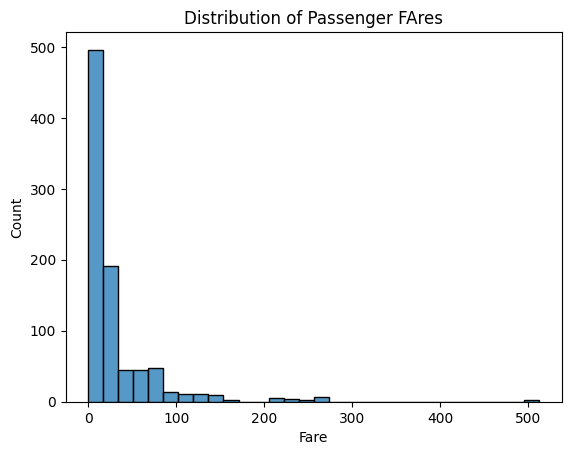

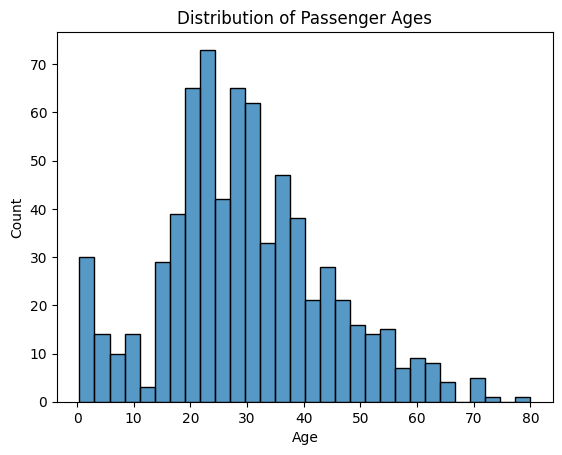

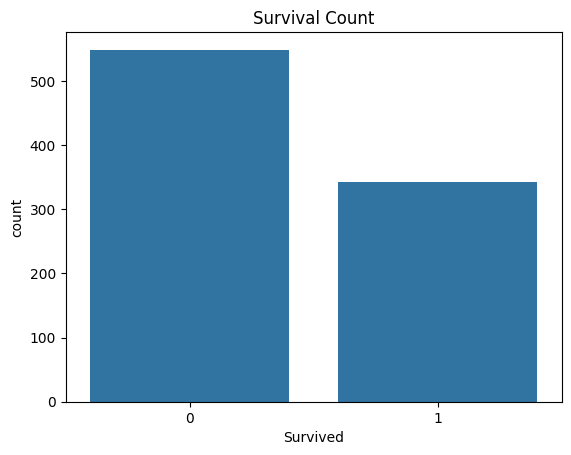

In [32]:
# plt.figure(figsize=(10,5))
# plt.plot(df.index, df['Fare'])

# plt.title("Line Plot of Passenger Fares")
# plt.xlabel("Passenger Index")
# plt.ylabel("Fare")
# plt.grid(True)
# plt.show()

sns.histplot(df['Fare'], bins=30)
plt.title("Distribution of Passenger FAres")
plt.show()
# This allows to see the distribution of the passenger fare which looks like it has some outliers in it


sns.histplot(df['Age'], bins=30)
plt.title("Distribution of Passenger Ages")
plt.show()
# Like the first plot, it allows us to see the age distribution in the data set which is very skewed as can be seen in the plot 

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()
# The countplot shows the number of occurance of an instance in the data set. In this case we are visualizing the number of times 0 and 1 were recorded in the data



In [33]:
df.shape
# Check the number of rows and columns

(891, 12)

In [34]:
df.isnull().sum()
# Checking for null/missing values
# Cabin column has the most missing values (687) followed by age (177) and then Embarked (2)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
# Filling in missing Age values with the mean age
# missing values are filled with mean because the Age column has numerical data and mean gives an average age of all the passengers
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [36]:
df.isnull().sum()
# Verifying if Age column still has missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df=df.dropna(subset=['Embarked'])
# Embarked column only has 2 missing rows, so it is safe to drop them as it won't affect the analysis in a major way

In [38]:
df.isnull().sum() 
# Verifying if Embarked column still has missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
print(f'Number of duplicate rows: ',df.duplicated().sum())
# Check for duplicated rows

Number of duplicate rows:  0


Interquartile Range 

In [40]:
Q1 = df['Fare'].quantile(0.25)   # 25th percentile
Q3 = df['Fare'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [41]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 889, dtype: float64

In [42]:
outliers = []

for fare in df['Fare']:
    if fare < lower or fare > upper:
        outliers.append(fare)

In [43]:
len(outliers)

114

In [44]:
print(outliers)
# Even though there are outliers in the data, i think there were some people who paid said fees and forms part of the data, so i will keep the outliers so i dont alter too much of the data

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]
